In [3]:
from captum.attr import IntegratedGradients,NoiseTunnel,GradientShap,Occlusion
from captum.attr import visualization as viz

from matplotlib.colors import LinearSegmentedColormap

from captum.insights import AttributionVisualizer, Batch
from captum.insights.attr_vis.features import ImageFeature

from fastai.vision.all import *
import albumentations
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

In [5]:
def get_train_aug(): return albumentations.Compose([
            albumentations.RandomResizedCrop(300,300),
            albumentations.Transpose(p=0.5),
            albumentations.VerticalFlip(p=0.5),
            albumentations.ShiftScaleRotate(p=0.5),
            albumentations.HueSaturationValue(
                hue_shift_limit=0.2, 
                sat_shift_limit=0.2, 
                val_shift_limit=0.2, 
                p=0.5),
            albumentations.CoarseDropout(p=0.5),
            albumentations.Cutout(p=0.5)
])

In [6]:
class AlbumentationsTransform(DisplayedTransform):
    split_idx,order=0,2
    def __init__(self, train_aug): store_attr()
    
    def encodes(self, img: PILImage):
        aug_img = self.train_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [44]:
path = './bird-species-classification-220-categories/Train'
fnames = get_image_files(path)
splits = RandomSplitter(valid_pct=0.2)
dls_org = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                get_y     = parent_label,
                splitter  = splits,
                item_tfms=Resize(600)).dataloaders(path,bs=16)

In [46]:
dls_org

In [24]:
dls = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                get_y     = parent_label,
                splitter  = splits,
                item_tfms=item_tfms).dataloaders(path,bs=16)

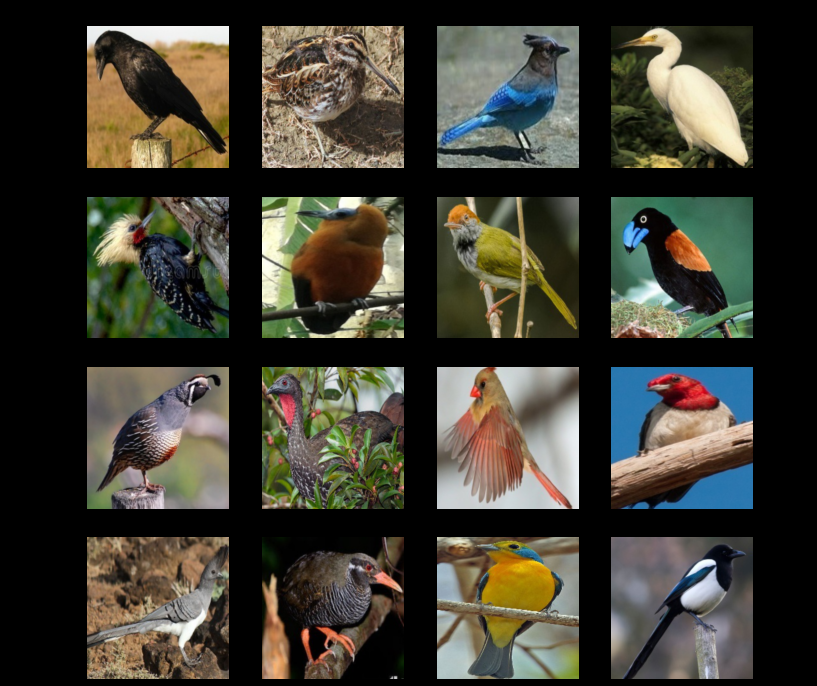

In [25]:
dls_org.show_batch(max_n=16)

In [26]:
item_tfms = [Resize(600), AlbumentationsTransform(get_train_aug())]

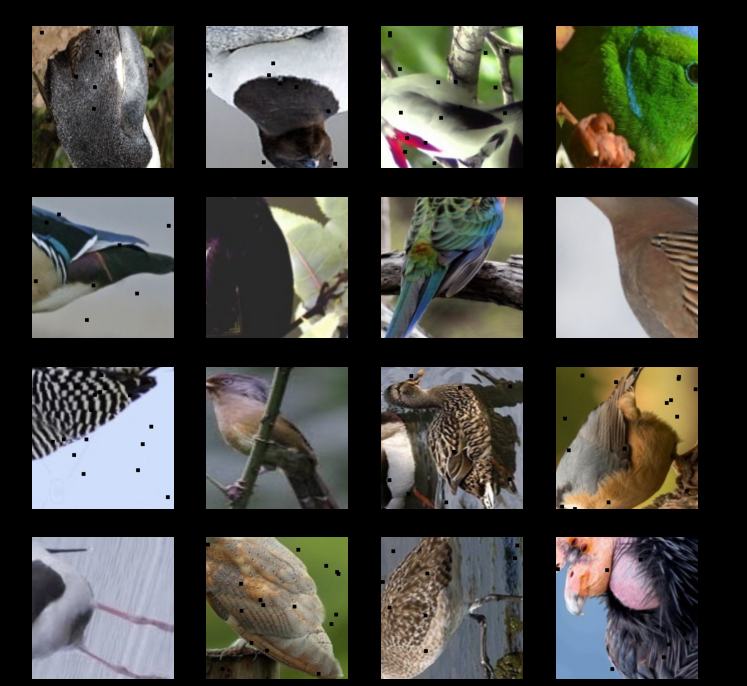

In [14]:
dls.show_batch(max_n=16)

In [43]:
dls_org.train_ds[1]

(PILImage mode=RGB size=224x224, TensorCategory(301))

In [41]:
dls.train_ds[1]

(PILImage mode=RGB size=224x224, TensorCategory(38))